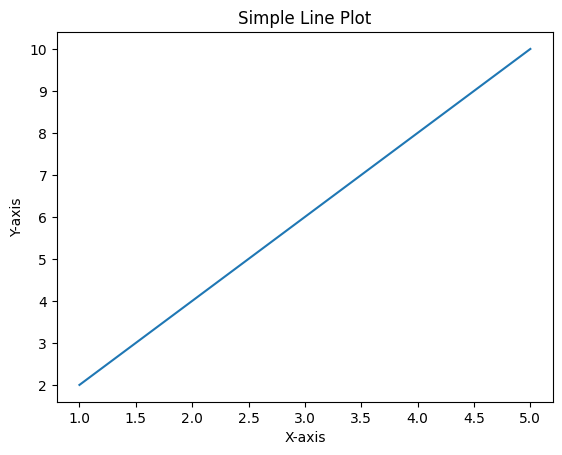

In [5]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')

# Display the plot
plt.show()

Git clone the repo and install the requirements. (ignore the pip errors about protobuf)

In [ ]:
#@title Environment Setup


OPTIONS = {}

USE_GOOGLE_DRIVE = True  #@param {type:"boolean"}
UPDATE_COMFY_UI = True  #@param {type:"boolean"}
WORKSPACE = 'ComfyUI'
OPTIONS['USE_GOOGLE_DRIVE'] = USE_GOOGLE_DRIVE
OPTIONS['UPDATE_COMFY_UI'] = UPDATE_COMFY_UI

if OPTIONS['USE_GOOGLE_DRIVE']:
    !echo "Mounting Google Drive..."
    %cd /

    from google.colab import drive
    drive.mount('/content/drive')

    WORKSPACE = "/content/drive/MyDrive/ComfyUI"
    %cd /content/drive/MyDrive

![ ! -d $WORKSPACE ] && echo -= Initial setup ComfyUI =- && git clone https://github.com/comfyanonymous/ComfyUI
%cd $WORKSPACE

if OPTIONS['UPDATE_COMFY_UI']:
  !echo -= Updating ComfyUI =-
  !git pull

!echo -= Install dependencies =-
!pip install xformers!=0.0.18 -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cu121 --extra-index-url https://download.pytorch.org/whl/cu118 --extra-index-url https://download.pytorch.org/whl/cu117

Mounting Google Drive...
/
Mounted at /content/drive
/content/drive/MyDrive
-= Initial setup ComfyUI =-
Cloning into 'ComfyUI'...
remote: Enumerating objects: 20218, done.
remote: Total 20218 (delta 0), reused 0 (delta 0), pack-reused 20218 (from 1)
Receiving objects: 100% (20218/20218), 68.54 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (13615/13615), done.
Updating files: 100% (424/424), done.
/content/drive/MyDrive/ComfyUI
-= Updating ComfyUI =-
Already up to date.
-= Install dependencies =-
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121, https://download.pytorch.org/whl/cu118, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is comp

Download some models/checkpoints/vae or custom comfyui nodes (uncomment the commands for the ones you want)

In [ ]:
# Checkpoints

### SDXL
### I recommend these workflow examples: https://comfyanonymous.github.io/ComfyUI_examples/sdxl/

#!wget -c https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/sd_xl_base_1.0.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-xl-refiner-1.0/resolve/main/sd_xl_refiner_1.0.safetensors -P ./models/checkpoints/

# SDXL ReVision
#!wget -c https://huggingface.co/comfyanonymous/clip_vision_g/resolve/main/clip_vision_g.safetensors -P ./models/clip_vision/

# SD1.5
!wget -c https://huggingface.co/Comfy-Org/stable-diffusion-v1-5-archive/resolve/main/v1-5-pruned-emaonly-fp16.safetensors -P ./models/checkpoints/

# SD2
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-2-1-base/resolve/main/v2-1_512-ema-pruned.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-2-1/resolve/main/v2-1_768-ema-pruned.safetensors -P ./models/checkpoints/

# Some SD1.5 anime style
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix2/AbyssOrangeMix2_hard.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix3/AOM3A1_orangemixs.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix3/AOM3A3_orangemixs.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/anything-v3-fp16-pruned.safetensors -P ./models/checkpoints/

# Waifu Diffusion 1.5 (anime style SD2.x 768-v)
#!wget -c https://huggingface.co/waifu-diffusion/wd-1-5-beta3/resolve/main/wd-illusion-fp16.safetensors -P ./models/checkpoints/


# unCLIP models
#!wget -c https://huggingface.co/comfyanonymous/illuminatiDiffusionV1_v11_unCLIP/resolve/main/illuminatiDiffusionV1_v11-unclip-h-fp16.safetensors -P ./models/checkpoints/
#!wget -c https://huggingface.co/comfyanonymous/wd-1.5-beta2_unCLIP/resolve/main/wd-1-5-beta2-aesthetic-unclip-h-fp16.safetensors -P ./models/checkpoints/


# VAE
!wget -c https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.safetensors -P ./models/vae/
#!wget -c https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/VAEs/orangemix.vae.pt -P ./models/vae/
#!wget -c https://huggingface.co/hakurei/waifu-diffusion-v1-4/resolve/main/vae/kl-f8-anime2.ckpt -P ./models/vae/


# Loras
#!wget -c https://civitai.com/api/download/models/10350 -O ./models/loras/theovercomer8sContrastFix_sd21768.safetensors #theovercomer8sContrastFix SD2.x 768-v
#!wget -c https://civitai.com/api/download/models/10638 -O ./models/loras/theovercomer8sContrastFix_sd15.safetensors #theovercomer8sContrastFix SD1.x
#!wget -c https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/sd_xl_offset_example-lora_1.0.safetensors -P ./models/loras/ #SDXL offset noise lora


# T2I-Adapter
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_depth_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_seg_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_sketch_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_keypose_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_openpose_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_color_sd14v1.pth -P ./models/controlnet/
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_canny_sd14v1.pth -P ./models/controlnet/

# T2I Styles Model
#!wget -c https://huggingface.co/TencentARC/T2I-Adapter/resolve/main/models/t2iadapter_style_sd14v1.pth -P ./models/style_models/

# CLIPVision model (needed for styles model)
#!wget -c https://huggingface.co/openai/clip-vit-large-patch14/resolve/main/pytorch_model.bin -O ./models/clip_vision/clip_vit14.bin


# ControlNet
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_canny_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11f1p_sd15_depth_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_seg_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15_softedge_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/comfyanonymous/ControlNet-v1-1_fp16_safetensors/resolve/main/control_v11u_sd15_tile_fp16.safetensors -P ./models/controlnet/

# ControlNet SDXL
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-canny-rank256.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-depth-rank256.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-recolor-rank256.safetensors -P ./models/controlnet/
#!wget -c https://huggingface.co/stabilityai/control-lora/resolve/main/control-LoRAs-rank256/control-lora-sketch-rank256.safetensors -P ./models/controlnet/

# Controlnet Preprocessor nodes by Fannovel16
#!cd custom_nodes && git clone https://github.com/Fannovel16/comfy_controlnet_preprocessors; cd comfy_controlnet_preprocessors && python install.py


# GLIGEN
#!wget -c https://huggingface.co/comfyanonymous/GLIGEN_pruned_safetensors/resolve/main/gligen_sd14_textbox_pruned_fp16.safetensors -P ./models/gligen/


# ESRGAN upscale model
#!wget -c https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P ./models/upscale_models/
#!wget -c https://huggingface.co/sberbank-ai/Real-ESRGAN/resolve/main/RealESRGAN_x2.pth -P ./models/upscale_models/
#!wget -c https://huggingface.co/sberbank-ai/Real-ESRGAN/resolve/main/RealESRGAN_x4.pth -P ./models/upscale_models/




### Run ComfyUI with cloudflared (Recommended Way)




In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

import subprocess
import threading
import time
import socket
import urllib.request

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch cloudflared (if it gets stuck here cloudflared is having issues)\n")

  p = subprocess.Popen(["cloudflared", "tunnel", "--url", "http://127.0.0.1:{}".format(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  for line in p.stderr:
    l = line.decode()
    if "trycloudflare.com " in l:
      print("This is the URL to access ComfyUI:", l[l.find("http"):], end='')
    #print(l, end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server

### Run ComfyUI with localtunnel




In [4]:
!npm install -g localtunnel

import threading

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch localtunnel (if it gets stuck here localtunnel is having issues)\n")

  print("The password/enpoint ip for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
  p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
  for line in p.stdout:
    print(line.decode(), end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 2s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

Exception in thread Thread-10 (iframe_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-77abea8d13ee>", line 7, in iframe_thread
NameError: name 'time' is not defined


python3: can't open file '//main.py': [Errno 2] No such file or directory


### Run ComfyUI with colab iframe (use only in case the previous way with localtunnel doesn't work)

You should see the ui appear in an iframe. If you get a 403 error, it's your firefox settings or an extension that's messing things up.

If you want to open it in another window use the link.

Note that some UI features like live image previews won't work because the colab iframe blocks websockets.

In [3]:
import threading
def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  from google.colab import output
  output.serve_kernel_port_as_iframe(port, height=1024)
  print("to open it in a window you can open this link here:")
  output.serve_kernel_port_as_window(port)

threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server

Exception in thread Thread-9 (iframe_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-3-dd6749d89cc2>", line 4, in iframe_thread
NameError: name 'time' is not defined


python3: can't open file '//main.py': [Errno 2] No such file or directory
